# Rotations of Ylm

The purpose of this document is to show how to rotate a spherical harmonic using Wigner D functions and Euler angles.

## Code

I use scipy to calculate spherical harmonics.
I use sympy to calculate Wigner D functions.  This is overkill.  Presumably there are faster numerical ways to calculate Wigner D matrices.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors # for plotting
from mpl_toolkits.mplot3d import Axes3D # for plotting
import numpy as np
from scipy.special import sph_harm
import matplotlib.image as mpimg

In [2]:
# Plot a linear combination of spherical harmonics
# Input: {(l1,m1):cof1 , (l2,m2):cof2 , ...}
def plotSph_harms(yset):
    
    phi = np.linspace(0, np.pi, 150)
    theta = np.linspace(0, 2*np.pi, 150)
    phi, theta = np.meshgrid(phi, theta)

    # The Cartesian coordinates of the unit sphere
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)

    total = np.zeros(len(phi),dtype='complex')
    for key, cof in yset.items():
        l=key[0]
        m=key[1]
        total = total + sph_harm(m, l, theta, phi)*cof
    
    fcolors = total.real
    fmax, fmin = fcolors.max(), fcolors.min()
    print('min',fmin,'max',fmax)
    fcolors = (fcolors - fmin)/(fmax - fmin)

    # Set the aspect ratio to 1 so our sphere looks spherical
    fig = plt.figure(figsize=plt.figaspect(1.))
    ax = fig.add_subplot(111, projection='3d')
 
    ax.plot([0,0],[1,1.25],[0,0],'k')
    ax.plot([1,1.25],[0,0],[0,0],'b')
    ax.plot([0,0],[0,0],[1,1.25],'g')
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
    ax.view_init(elev=30,azim=45)
    # Turn off the axis planes
    #ax.set_axis_off()
    plt.show()
    

In [3]:
# Return a new set of ylm coefficients after rotation
def rotate_multi_ylm(wigset,alpha,beta,gamma,yset):
    tol=10**-14
    out={}
    for key, cof in yset.items():
        l=key[0]
        m=key[1]
        for mp in range(-l,l+1):
            D=wigset.get(l,mp,m,alpha,beta,gamma)
            if abs(D)>tol:
                val = out.get((l,mp),0.0j)
                out[(l,mp)]=val+D*cof
    return out 

A note on index order:  I write $D^{m',m}$ where $m'$ is the z-component after rotation, while $m$ is the z component before rotation.

In [4]:
import wignerD as wd
wigset = wd.wigner_d_vals()

## Convention Demonstrated

I will describe an \textbf{active} rotation.  Note that the sympy package I use has documentation for a passive rotation; however I swap the m and mp in its input so I get active rotations.

I will use \textbf{z-y-z convention}.  That is, the rotation is first performed about the z axis by angle $\alpha$ to give the x'-y'-z' coordinate system.  Then the object is rotate about the y' axis by an angle $\beta$ to form the x''-y''-z'' axis.  Finally the system is rotate about an angle $\gamma$ about the z'' axis.

I illustrate this below by rotating a picture of $Y_3^2$.

In [5]:
yset={(3,2):1.0}

min -0.393312406142 max 0.393312406142


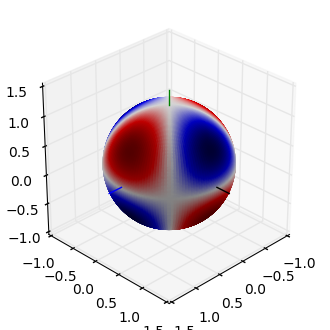

In [6]:
plotSph_harms(yset)

The above figure is a color map of the real part of $Y_3^2(\vec{u})$.  The x-y-z axis are colored blue-black-green respectively.

Next we rotate this figure by an angle $\alpha = \pi/6$ about its z axis.

In [7]:
alpha=np.pi/6.0; beta=0.0; gamma=0.0
newyset = rotate_multi_ylm(wigset,alpha,beta,gamma,yset)

min -0.393302692311 max 0.393302692311


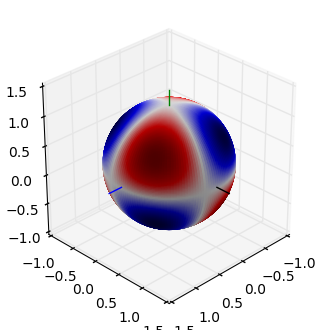

In [8]:
plotSph_harms(newyset)

The above picture shows 
$$
\mathrm{Re}[\sum_{m'} Y_3^{m'}(\vec{u})D_{3}^{m',2}(\pi/6,0,0)]
$$
that is, $Y_3^2$ rotated about the z axis by $30^o$.

Next we will rotate it by an angle $\beta=\pi/2$ about the new y' axis (not shown). 

min -0.393338405079 max 0.393222835617


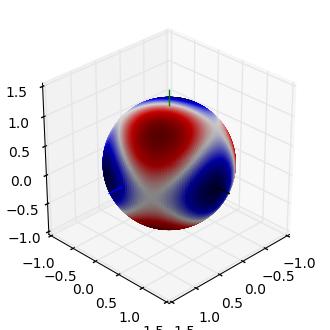

In [9]:
alpha=np.pi/6.0; beta=np.pi/2.0; gamma=0.0
newyset = rotate_multi_ylm(wigset,alpha,beta,gamma,yset)
plotSph_harms(newyset) 

min -0.393338405079 max 0.393222835617


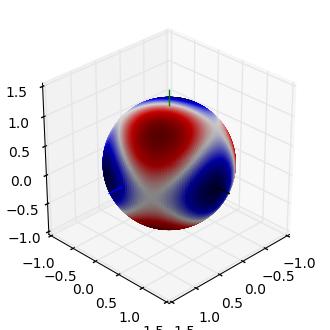

In [10]:
plotSph_harms(newyset)

The above picture shows 
$$
\mathrm{Re}[\sum_{m'} Y_3^{m'}(\vec{u})D_{3}^{m',2}(\pi/6,\pi/2,0)]
$$

Finally we rotate by an angle $\gamma=\pi/6$ about the new z'' axis (not shown).

min -0.393221745025 max 0.393329484289


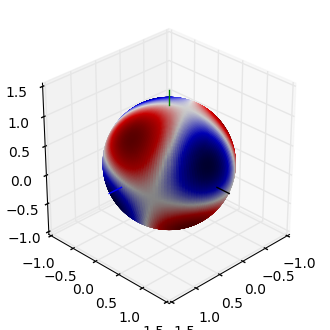

In [11]:
alpha=np.pi/6.0; beta=np.pi/2.0; gamma=np.pi/6.0
newyset = rotate_multi_ylm(wigset,alpha,beta,gamma,yset)
plotSph_harms(newyset) 

## Alternative Interpretation

There is another way to understand the way Euler rotations work.  This is not a different convention, but an equivalent explanation.  Rather than rotate about the new axis at each successive rotation we may rotate about a fixed set of coordinates but perform the rotations in the opposite order.

Keeping in mind that rotation are applied from the left, the folling identity holds:
$$
R_{z''}(\gamma)R_{y'}(\beta)R_z(\alpha)=R_z(\alpha)R_y(\beta)R_z(\gamma)
$$
see "Modern Quantum Mechanics" by Sakurai for proof.

We will illustrate this.  

min -0.393312406142 max 0.393312406142


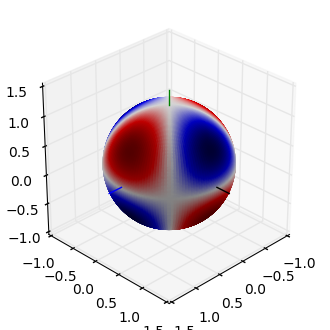

In [12]:
yset={(3,2):1.0}
plotSph_harms(yset)

The above shows $Y_3^2$

First perform $\gamma=\pi/6$ rotation about z.

min -0.393302692311 max 0.393302692311


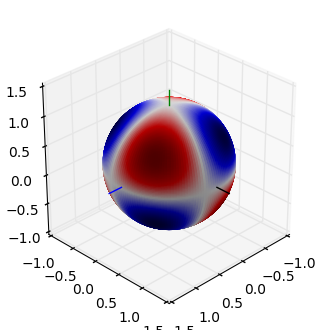

In [13]:
alpha=0; beta=0; gamma=np.pi/6.0
newyset = rotate_multi_ylm(wigset,alpha,beta,gamma,yset)
plotSph_harms(newyset) 

Then $\beta=\pi/2$ rotation about y.

min -0.3933201253 max 0.393158609453


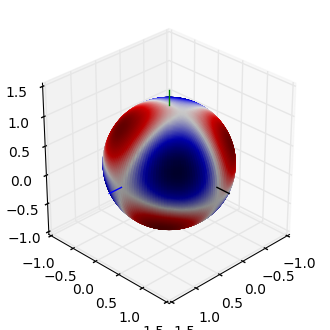

In [14]:
alpha=0; beta=np.pi/2.0; gamma=np.pi/6.0
newyset = rotate_multi_ylm(wigset,alpha,beta,gamma,yset)
plotSph_harms(newyset) 

Finally $\alpha$ rotation about z again.

min -0.393221745025 max 0.393329484289


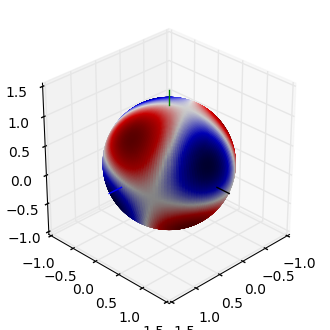

In [15]:
alpha=np.pi/6.0; beta=np.pi/2.0; gamma=np.pi/6.0
newyset = rotate_multi_ylm(wigset,alpha,beta,gamma,yset)
plotSph_harms(newyset) 

## Special Case of 4pt isotropic

When there is no orientationally dependent field, this sort of average
can be performed to the first and third propagators in the following
way.
\begin{alignat*}{2}
G\left(0\to1\to2\to3\right)= & \frac{1}{\left(4\pi\right)^{3}}\int du_{0}\int du_{1}\int du_{2}\int du_{3} & \left(\sum_{l_{0},l_{f},m}Y_{l_{f}}^{*m}\left(\Gamma_{1}^{-1}\vec{u}_{1}\right)Y_{l_{0}}^{m}\left(\Gamma_{1}^{-1}\vec{u}_{0}\right)\mathcal{G}_{l_{0},l_{f},}^{m}\left(K_{1},p_{1}\right)\right)\cdot\\
 &  & \left(\sum_{l_{0},l_{f},m}Y_{l_{f}}^{*m}\left(\Gamma_{2}^{-1}\vec{u}_{2}\right)Y_{l_{0}}^{m}\left(\Gamma_{2}^{-1}\vec{u}_{1}\right)\mathcal{G}_{l_{0},l_{f},}^{m}\left(K_{2},p_{2}\right)\right)\cdot\\
 &  & \left(\sum_{l_{0},l_{f},m}Y_{l_{f}}^{*m}\left(\Gamma_{3}^{-1}\vec{u}_{3}\right)Y_{l_{0}}^{m}\left(\Gamma_{3}^{-1}\vec{u}_{2}\right)\mathcal{G}_{l_{0},l_{f},}^{m}\left(K_{3},p_{3}\right)\right)\ 
\end{alignat*}


The $\Gamma$ stand for rotations that put $K$ in the appropate direction

\begin{alignat*}{2}
G\left(0\to1\to2\to3\right)= & \frac{1}{\left(4\pi\right)^{3}}\int du_{1}\int du_{2} & 2\sqrt{\pi}\left(\sum_{l_{0},l_{f},m}Y_{l_{f}}^{*m}\left(\Gamma_{1}^{-1}\vec{u}_{1}\right)\mathcal{G}_{0,l_{f},}^{0}\left(K_{1},p_{1}\right)\right)\cdot\\
 &  & \left(\sum_{l_{0},l_{f},m}Y_{l_{f}}^{*m}\left(\vec{u}_{2}\right)Y_{l_{0}}^{m}\left(\vec{u}_{1}\right)\mathcal{G}_{l_{0},l_{f},}^{m}\left(K_{2},p_{2}\right)\right)\cdot\\
 &  & 2\sqrt{\pi}\left(\sum_{l_{0},l_{f},m}Y_{l_{0}}^{m}\left(\Gamma_{3}^{-1}\vec{u}_{2}\right)\mathcal{G}_{l_{0},0,}^{0}\left(K_{3},p_{3}\right)\right)\ 
\end{alignat*}


Note that I can assume that $\vec{K}_{2}$ points into the $\hat{z}$
direction.

\begin{alignat*}{2}
G\left(0\to1\to2\to3\right)= & \frac{1}{\left(4\pi\right)^{3}}\int du_{1}\int du_{2} & 2\sqrt{\pi}\left(\sum_{l_{f}}Y_{l_{f}}^{*0}\left(\Gamma_{1}^{-1}\vec{u}_{1}\right)\mathcal{G}_{0,l_{f},}^{0}\left(K_{1},p_{1}\right)\right)\cdot\\
 &  & \left(\sum_{l_{0},l_{f},m}Y_{l_{f}}^{*m}\left(\vec{u}_{2}\right)Y_{l_{0}}^{m}\left(\vec{u}_{1}\right)\mathcal{G}_{l_{0},l_{f},}^{m}\left(K_{2},p_{2}\right)\right)\cdot\\
 &  & 2\sqrt{\pi}\left(\sum_{l_{0}}Y_{l_{0}}^{0}\left(\Gamma_{3}^{-1}\vec{u}_{2}\right)\mathcal{G}_{l_{0},0,}^{0}\left(K_{3},p_{3}\right)\right)\ 
\end{alignat*}


Note that the first and third propagators are now axially symmetric.
We may rotate them into the approprate direction.

\begin{alignat*}{2}
G\left(0\to1\to2\to3\right)= & \frac{1}{\left(4\pi\right)^{3}}\int du_{1}\int du_{2} & 2\sqrt{\pi}\left(\sum_{l_{f}}Y_{l_{f}}^{*0}\left(\vec{u}_{1}\right)D_{l_{f}}^{*m'0}\left(\alpha_{1},\beta_{1},0\right)\mathcal{G}_{0,l_{f},}^{0}\left(K_{1},p_{1}\right)\right)\cdot\\
 &  & \left(\sum_{l_{0},l_{f},m}Y_{l_{f}}^{*m}\left(\vec{u}_{2}\right)Y_{l_{0}}^{m}\left(\vec{u}_{1}\right)\mathcal{G}_{l_{0},l_{f},}^{m}\left(K_{2},p_{2}\right)\right)\cdot\\
 &  & 2\sqrt{\pi}\left(\sum_{l_{0},m}Y_{l_{0}}^{m'}\left(\vec{u}_{2}\right)D_{l_{0}}^{m'0}\left(0,\beta_{2},0\right)\mathcal{G}_{l_{0},0,}^{0}\left(K_{3},p_{3}\right)\right)\ 
\end{alignat*}


which simplifies to

$$
G\left(0\to1\to2\to3\right)=\frac{1}{\left(4\pi\right)^{2}}D_{l_{1}}^{*m'0}\left(\alpha_{1},\beta_{1},0\right)D_{l_{3}}^{m'0}\left(0,\beta_{2},0\right)\mathcal{G}_{0,l_{1},}^{0}\left(K_{1},p_{1}\right)\mathcal{G}_{l_{1},l_{2},}^{m}\left(K_{2},p_{2}\right)\mathcal{G}_{l_{3},0,}^{0}\left(K_{2},p_{3}\right)
$$


because the complx conjugate just canges the sign of $\alpha$ in
our problem which our problem is symmetric to we may neglect it

$$
G\left(0\to1\to2\to3\right)=\frac{1}{\left(4\pi\right)^{2}}\sum_{l_{1},l_{2},\mu}D_{l_{1}}^{m'0}\left(\alpha_{1},\beta_{1},0\right)D_{l_{2}}^{m'0}\left(0,\beta_{2},0\right)\mathcal{G}_{0,l_{1},}^{0}\left(K_{1},p_{1}\right)\mathcal{G}_{l_{1},l_{2},}^{m}\left(K_{2},p_{2}\right)\mathcal{G}_{l_{2},0,}^{0}\left(K_{3},p_{3}\right)
$$

min -0.74635266518 max 0.74635266518


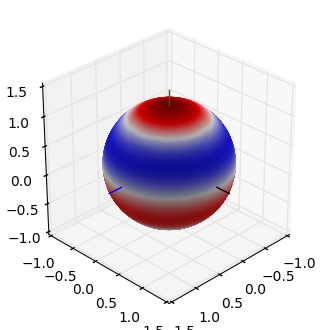

In [16]:
yset={(3,0):1.0}
plotSph_harms(yset)

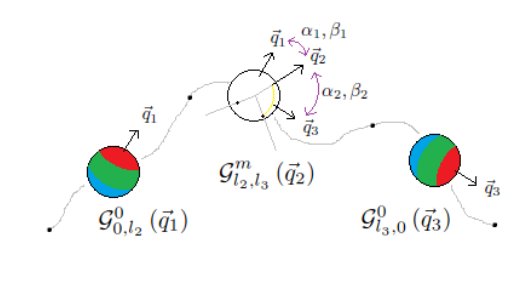

In [17]:
img = mpimg.imread('EulerAngleChain.png')
plt.imshow(img)
plt.axis('off')
plt.show()

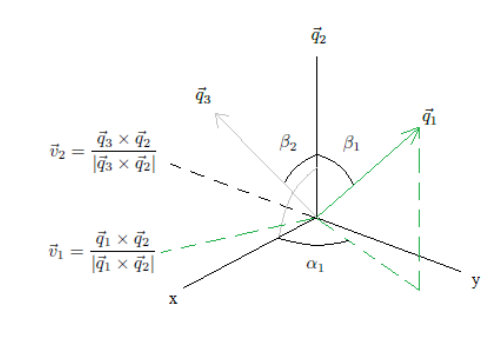

In [18]:
img = mpimg.imread('EulerAngleFromV.png')
plt.imshow(img)
plt.axis('off')
plt.show()

The first and last propagators are symmetrical about $\vec{q}_{1}$and
$\vec{q}_{3}$ respectively; hence the $m=0$ in their sphirical harmonics.
We need to find the Euler angles $\alpha_{1},\beta_{1}$ that rotate
$\vec{q}_{2}\to\vec{q}_{1}$ as well as the Euler angles $\alpha_{2},\beta_{2}$
that rotate $\vec{q}_{2}\to\vec{q}_{3}$. These angles are all specified
in the \uline{$\vec{u}'_{2}$} basis which has $\vec{q}_{2}$ as
it's $\hat{z}$ axis. We use the z-y'-z'' convection for the Euler
angles {[}though we may as well say the z-y' convection because the
final angle isn't necessary{]}. Part b is a blowup of the middle propagator
in part a. We may arbitrarily rotate the $\vec{u}_{2}$ axis about
it's $\hat{z}$ axis because $\Gamma_{2}$ is not a fully defined
rotation. For convenince we but $\vec{q}_{3}$ in the xz plane sot
that $\alpha_{2}=0$. We see that $\cos\left(\beta_{2}\right)=\vec{q}_{2}\cdot\vec{q}_{1}$
and $\cos\left(\beta_{1}\right)=\vec{q}_{2}\cdot\vec{q}_{1}$ and
$\alpha_{1}=\mathrm{acos\left(\vec{v}_{1}\cdot\vec{v}_{2}\right)}$